# Notebook Preparation

In [ ]:
!pip install ucimlrepo
!pip install pandas
!pip install ydata-profiling
!pip install ipywidgets
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install catboost
!pip install plotly

In [2]:
# Data processing tools
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np

# Visualization tools
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# ML tools
from sklearn.impute import KNNImputer

pd.options.display.max_columns = None

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# create a DataFrame with features and targets
df = pd.concat([X, y], axis=1)

# The Dataset
A set of 8124 mushrooms described in terms of physical characteristics.
<br>Classification: poisonous or edible

## Brief feature descriptions:
The dataset contains information about these parts of mushrooms. <br>The number in parentheses indicates the cardinality of each feature:

>| Feature Category  | Details                                | Description                         |
|-----------|----------------------------------------|-------------------------------------|
| 1. Cap    | Shape(6), Surface(4), Color(10)       | Top part of the mushroom            |
| 2. Gills  | Attachment(2), Spacing(2), Size(2), Color(12) | Papery ribs under the cap        |
| 3. Stalk  | Shape(2), Root(5), Surface AR(4), Surface BR(4), Color AR(9), Color BR(9) | Stem supporting the cap         |
| 4. Veil   | Type(1), Color(4)                     | Membrane that covers cap and stalk of an immature mushroom|
| 5. Ring   | Number(3), Type(5)                    | Remnant from partial veil           |
| 6. Misc   | Bruises(2), Odor(9), Spore color(9), Population(6), Habitat(7) | Additional features and characteristics |


## Feature names and description:
Below is a comprehensive description of each feature, along with a mapping of the values used in the dataset to their corresponding real-world meanings:

>| Feature                  | Data Type   | Possible Values                                              |
 |--------------------------|-------------|---------------------------------------------------------------|
 | cap-shape                | categorical | b = bell, c = conical, x = convex, f = flat, l = knobbed, s = sunken |
 | cap-surface              | categorical | f = fibrous, g = grooves, y = scaly, s = smooth              |
 | cap-color                | categorical | n = brown, b = buff, c = cinnamon, g = gray, r = green, p = pink, u = purple, e = red, w = white, y = yellow |
 | bruises                  | binary      | t = bruises, f = no                                          |
 | odor                     | categorical | a = almond, l = anise, c = creosote, y = fishy, f = foul, m = musty, n = none, p = pungent, s = spicy |
 | gill-attachment          | binary      | attached = a, free = f                                       |
 | gill-spacing             | binary      | c = close, w = crowded                                       |
 | gill-size                | binary      | b = broad, n = narrow                                        |
 | gill-color               | categorical | k = black, n = brown, b = buff, h = chocolate, g = gray, r = green, o = orange, p = pink, u = purple, r = red, w = white, y = yellow |
 | stalk-shape              | binary      | e = enlarging, t = tapering                                  |
 | stalk-root               | categorical | b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing |
 | stalk-surface-above-ring | categorical | f = fibrous, y = scaly, k = silky, s = smooth                |
 | stalk-surface-below-ring | categorical | f = fibrous, y = scaly, k = silky, s = smooth                |
 | stalk-color-above-ring   | categorical | n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow |
 | stalk-color-below-ring   | categorical | n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow |
 | veil-type                | unary       | p = partial                                                  |
 | veil-color               | categorical | n = brown, o = orange, w = white, y = yellow                 |
 | ring-number              | categorical | n = none, o = one, t = two                                   |
 | ring-type                | categorical | c = cobwebby, e = evanescent, f = flaring, l = large, n = none, p = pendant, s = sheathing, z = zone |
 | spore-print-color        | categorical | k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, y = yellow |
 | population               | categorical | a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary |
 | habitat                  | categorical | g = grasses,l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods
 

In [4]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


# Cap Shapes
![cap shape.jpg](./CapShapes.jpeg)

# Cap Surfaces
![CapSurfaces.jpg](./CapSurfaces.jpeg)

# Gill Attachments
![Gill Attachments.jpg](./GillAttachments.png)

# Stalk Shape
![Stalk Shape.jpg](./StalkShape.jpeg)

# Veil Types
![GVeil Types.jpg](./VeilTypes.png)

# Ring Types
![Ring Types.jpg](./RingTypes.jpeg)



In [5]:
report = ProfileReport(df, title="initial vizualization")

In [6]:
# save the report to an HTML file
# report.to_file("profile_report.html")

In [7]:
# veil-type has constant value and so we drop it
df = df.drop('veil-type', axis = 1)

In [8]:
df['stalk-root'].unique()


array(['e', 'c', 'b', 'r', nan], dtype=object)

In [9]:
df['stalk-root'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8119     True
8120     True
8121     True
8122     True
8123     True
Name: stalk-root, Length: 8124, dtype: bool

In [10]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume df is your DataFrame and "stalk-root" is your target column

# Exclude rows with 'nan' in 'stalk-root' column
df_no_nan = df.dropna(subset=['stalk-root'])

# Prepare the features and target
X = df_no_nan.drop("stalk-root", axis=1)
y = df_no_nan["stalk-root"]

# Identify categorical features
cat_features = X.select_dtypes(include=['object']).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=10,
                           learning_rate=1,
                           depth=2,
                           loss_function='MultiClass')

# Train the model on the training data
model.fit(X_train, y_train, cat_features.tolist())

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy: ", accuracy)

# Print out the predictions
print("Predictions: ", y_pred)

# Identify the indices where values are NaN
nan_indexes = df[df['stalk-root'].isnull()].index

# Prepare the features for prediction by excluding the target column
X_pred = df.drop("stalk-root", axis=1)

# Use the trained model to predict the missing values
preds_nan = model.predict(X_pred.iloc[nan_indexes])

# Replace NaN values with predicted values in the DataFrame
df.loc[nan_indexes, 'stalk-root'] = preds_nan.flatten()


0:	learn: 0.5322082	total: 61ms	remaining: 549ms
1:	learn: 0.3978932	total: 69.5ms	remaining: 278ms
2:	learn: 0.1517054	total: 79.2ms	remaining: 185ms
3:	learn: 0.4424038	total: 89ms	remaining: 133ms
4:	learn: 0.8935955	total: 98ms	remaining: 98ms
5:	learn: 0.4873204	total: 109ms	remaining: 72.7ms
6:	learn: 0.3408531	total: 117ms	remaining: 50.1ms
7:	learn: 0.2054493	total: 125ms	remaining: 31.4ms
8:	learn: 0.1472555	total: 134ms	remaining: 14.8ms
9:	learn: 0.1341712	total: 144ms	remaining: 0us
Model Accuracy:  0.9991142604074402
Predictions:  [['e']
 ['b']
 ['b']
 ...
 ['c']
 ['b']
 ['b']]


In [11]:
df.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
8119,k,s,n,f,n,a,c,b,y,e,b,s,s,o,o,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,b,s,s,o,o,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,b,s,s,o,o,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,c,s,k,w,w,w,o,e,w,v,l,p
8123,x,s,n,f,n,a,c,b,y,e,b,s,s,o,o,o,o,p,o,c,l,e


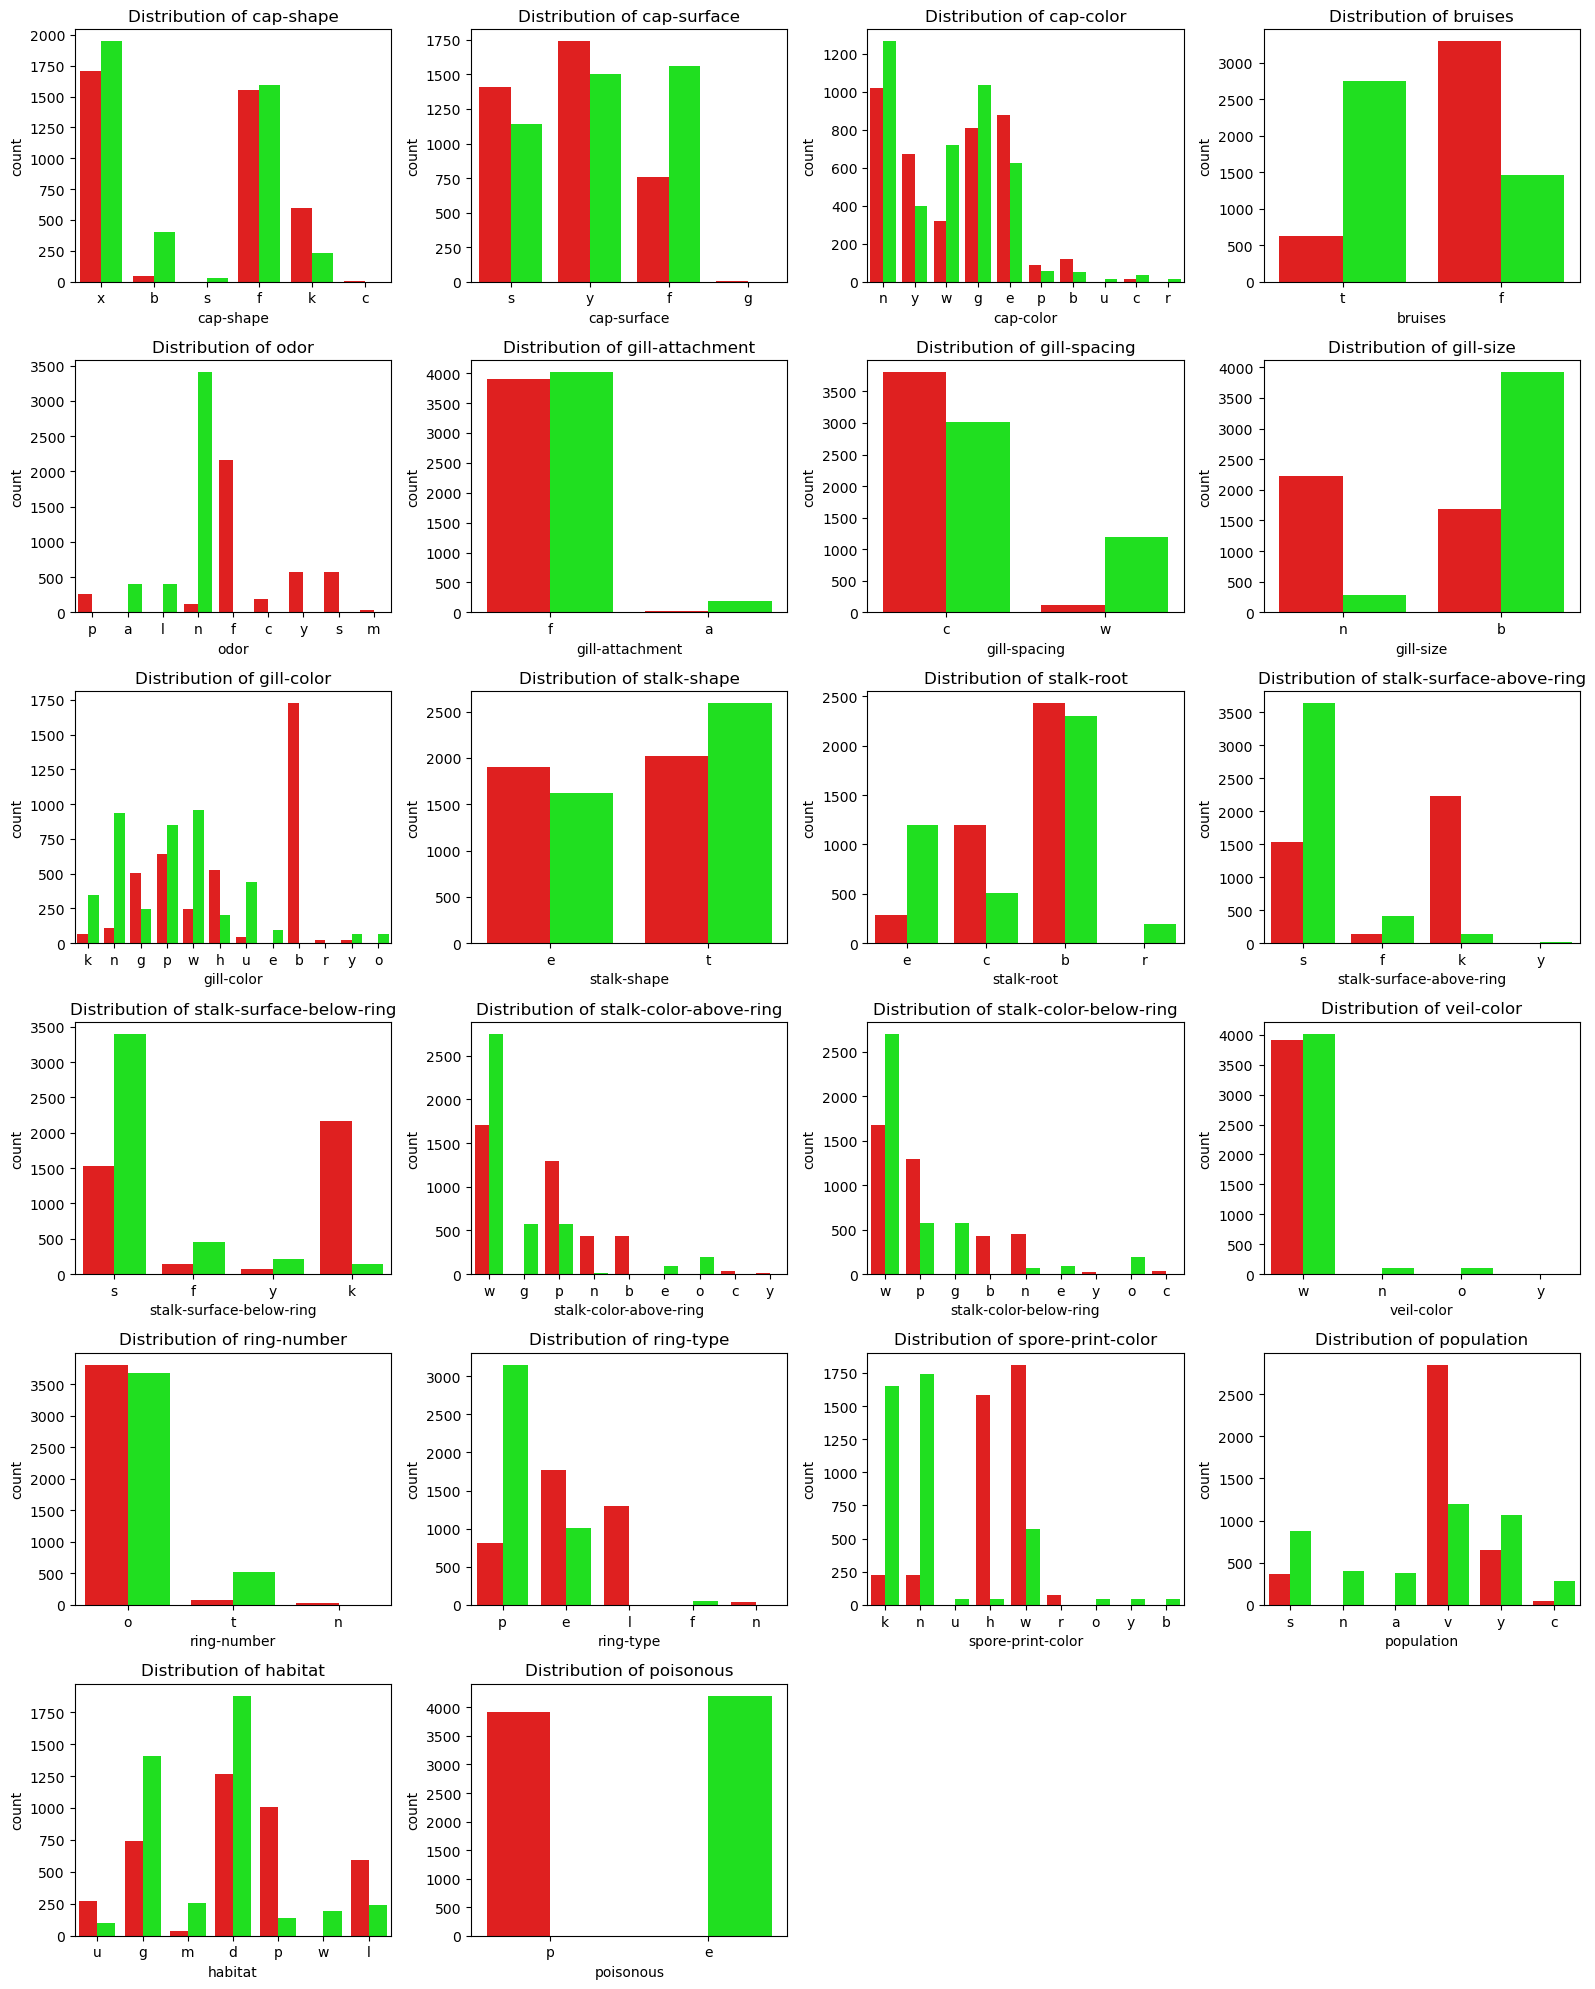

In [12]:
features = df.columns

yellow = '#FCEB26' 
green = '#00FF00' # E
red = '#FF0000'  # P
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 20))

for feature, ax in zip(features, axes.flatten()):    
    sns.countplot(x=feature, hue='poisonous', data=df, ax=ax, palette=[red, green], linewidth=0)
    ax.set_title(f"Distribution of {feature}")
    ax.get_legend().remove()

# Remove any unused subplots
for remaining_ax in axes.flatten()[len(features):]:
    remaining_ax.remove()

plt.tight_layout()
plt.show()

## A visual human model
Just with this information, a human would be able to make a reasonably effective model by writing down simple rules:

#### Poisonous
**If our encountered mushroom has one of *any* of the following:** 
<br>`buff stalk color below ring`, `no ring`, `pungent odor`, 
`poisonous class`, `foul odor`, `creosote odor`, `no ring`, `buff stalk color above ring`, 
`buff gill color`, `green gill color`, `green spore print color`, 
`yellow stalk color below ring`, `conical cap shape`, `yellow veil color`, 
`cinnamon stalk color above ring`, `large ring type`, `fishy odor`, 
`yellow stalk color above ring`, `musty odor`, `cinnamon stalk color below ring`, 
`grooves cap surface`, `spicy odor`; we can be certain it's **poisonous**.

#### Edible
**If our encountered mushroom has one of *any* of the following:**
<br>`red stalk color below ring`, `orange stalk color below ring`, `yellow spore print color`, 
`abundant population`, `purple spore print color`, `edible class`, `red stalk color above ring`, 
`orange veil color`, `red cap color`, `almond odor`, `gray gill color`, `purple cap color`, 
`orange spore print color`, `flaring ring type`, `sunken cap shape`, `waste habitat`, 
`gray stalk color above ring`, `rooted stalk root`, `numerous population`, `brown veil color`, 
`buff spore print color`, `orange gill color`, `orange stalk color above ring`, `anise odor`, 
`gray stalk color below ring`; we can be certain it's **edible**.

Let's see how many mushrooms in our DataFrame we can successfully classify with this model:

In [30]:
df_encoded = pd.get_dummies(df, columns=df.columns)

print(df_encoded.columns)

df_poisonous = df_encoded.loc[df_encoded.poisonous_p == 1]
df_edible = df_encoded.loc[df_encoded.poisonous_e == 1]

# Find features that are never present in edible mushrooms (mean == 0)
never_in_edible = df_edible.columns[df_edible.mean() == 0]

# Find features that are present in poisonous mushrooms (mean > 0)
in_poisonous = df_poisonous.columns[df_poisonous.mean() > 0]

# Find the intersection of the two sets: features that are never in edible and are in poisonous
exclusive_features_poisonous = list(set(never_in_edible) & set(in_poisonous))

# Find features that are never present in poisonous mushrooms (mean == 0)
never_in_poisonous = df_poisonous.columns[df_poisonous.mean() == 0]

# Find features that are present in edible mushrooms (mean > 0)
in_edible = df_edible.columns[df_edible.mean() > 0]

# Find the intersection of the two sets: features that are never in poisonous and are in edible
exclusive_features_edible = list(set(never_in_poisonous) & set(in_edible))

# Use any() function across rows (axis=1) to check if any feature is 1 (True) for each mushroom
df_encoded['poisonous'] = df_encoded[exclusive_features_poisonous].any(axis=1)
df_encoded['edible'] = df_encoded[exclusive_features_edible].any(axis=1)

# Count the number of poisonous and edible mushrooms
count_poisonous = df_encoded['poisonous'].sum()
count_edible = df_encoded['edible'].sum()

print(f"Poisonous mushrooms: {count_poisonous} found out of {(df_encoded.poisonous_p == 1).sum()} total poisonous mushrooms.")
print(f"Edible mushrooms: {count_edible} found out of {(df_encoded.poisonous_e == 1).sum()} total edible mushrooms.")

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_y', 'habitat_d', 'habitat_g', 'habitat_l', 'habitat_m',
       'habitat_p', 'habitat_u', 'habitat_w', 'poisonous_e', 'poisonous_p'],
      dtype='object', length=117)
Poisonous mushrooms: 3916 found out of 3916 total poisonous mushrooms.
Edible mushrooms: 4208 found out of 4208 total edible mushrooms.


In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load and encode DataFrame
df_reduced = df.drop(columns='poisonous')
df_encoded = pd.get_dummies(df_reduced, columns=df_reduced.columns)

# Perform t-SNE dimensionality reduction to 3D
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(df_encoded)
df_tsne = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])

# Perform KMeans clustering with 23 clusters
kmeans = KMeans(n_clusters=23, n_init='auto', random_state=42)
df_tsne['cluster'] = kmeans.fit_predict(df_tsne)


import plotly
import plotly.express as px

# Visualize the 3D t-SNE plot with colored clusters using Plotly Express 3D
fig = px.scatter_3d(
    df_tsne,
    x='tsne1',
    y='tsne2',
    z='tsne3',
    color='cluster',
    color_continuous_scale  = plotly.colors.sequential.Viridis,
    title='3D t-SNE with K-means Clustering',
    hover_name=df_tsne.index)

fig.show()

In [15]:

# Add class back in for visualization
df_tsne['poisonous'] = df['poisonous'].map({'e':'Edible', 'p':'Poisonous'})

# Visualize class data to see if our spacial clusters clustered poisonous mushrooms together
fig = px.scatter_3d(df_tsne, 
                    x='tsne1', 
                    y='tsne2', 
                    z='tsne3', 
                    color='poisonous',
                    color_discrete_sequence=[red, yellow],
                    title='3D t-SNE with Edibility',
                    hover_name=df_tsne.index)

fig.show()

In [16]:
# Map class to numerical in for visualization
df_tsne['poisonous'] = df_tsne['poisonous'].map({'Edible' : 0, 'Poisonous' : 1})

# We will use this to highlight mushrooms that may be difficult to classify
def all_same_class(group):
    return int(group['poisonous'].nunique() > 1)

# Group the DataFrame by 'cluster' and apply the 'all_same_class' function
cluster_same_class = df_tsne.groupby('cluster').apply(all_same_class)

# Map the result back to the DataFrame
df_tsne['mixed_class'] = df_tsne['cluster'].map(cluster_same_class)

def increment_mixed_class(row):
    if row['mixed_class'] == 1:
        return 1 if row['poisonous'] == 0 else 2
    else:
        return 0

# Apply the 'increment_mixed_class' function to the DataFrame row-wise (axis=1)
df_tsne['mixed_class'] = df_tsne.apply(increment_mixed_class, axis=1)


import plotly.graph_objects as go

# Create a 3D scatter plot with specified opacity, marker symbol, and color
fig = go.Figure()

# Add a trace for the first group with reduced opacity (mushrooms we're not interested in)
fig.add_trace(go.Scatter3d(
    x=df_tsne[df_tsne['mixed_class'] == 0]['tsne1'],
    y=df_tsne[df_tsne['mixed_class'] == 0]['tsne2'],
    z=df_tsne[df_tsne['mixed_class'] == 0]['tsne3'],
    mode='markers',
    marker=dict(
        size=6,
        color=df_tsne[df_tsne['mixed_class'] == 0]['mixed_class'],
        colorscale=[green, green],
        opacity=0.05  # Reduced opacity for the first group
    ),
    text=df_tsne[df_tsne['mixed_class'] == 0]['cluster'],
    name='Good Cluster'
))

# Add a trace for the second group with normal opacity (mushrooms that may be misclassified)
fig.add_trace(go.Scatter3d(
    x=df_tsne[df_tsne['mixed_class'] >= 1]['tsne1'],
    y=df_tsne[df_tsne['mixed_class'] >= 1]['tsne2'],
    z=df_tsne[df_tsne['mixed_class'] >= 1]['tsne3'],
    mode='markers',
    marker=dict(
        size=6,
        color=df_tsne[df_tsne['mixed_class'] >= 1]['mixed_class'],
        colorscale=[yellow, red],
        opacity=1  # Normal opacity for the second group
    ),
    text=df_tsne[df_tsne['mixed_class'] >= 1]['cluster'],
    name='Poor Cluster'
))

fig.update_layout(scene=dict(xaxis_title='tsne1', yaxis_title='tsne2', zaxis_title='tsne3'),
                  title='Unsuccessfully Clustered Mushrooms', showlegend=False)
fig.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df_encoded = pd.get_dummies(df)

# Extract the features (X) and target variable (y)
X = df_encoded.drop("poisonous_e", axis=1)
y = df_encoded["poisonous_e"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"RandomForestClassifier Accuracy: {accuracy}")

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LogisticRegression Accuracy: {accuracy}")

RandomForestClassifier Accuracy: 1.0
LogisticRegression Accuracy: 1.0
